In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
az.style.use("arviz-darkgrid")

In [3]:
data = bmb.load_data("cherry_blossoms")
data

,year,doy,temp,temp_upper,temp_lower
0,801,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1210,2011,99.0,NaN,NaN,NaN
1211,2012,101.0,NaN,NaN,NaN
1212,2013,93.0,NaN,NaN,NaN
1213,2014,94.0,NaN,NaN,NaN


In [4]:
data = data.dropna(subset=["doy"]).reset_index(drop=True)
data.shape

(827, 5)

In [5]:
def plot_scatter(data):
    _, ax = plt.subplots()

    ax.scatter(data["year"], data["doy"], alpha=0.4, s=20)
    ax.set_title("Day of the first bloom per year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Days of the first bloom")
    
    return ax

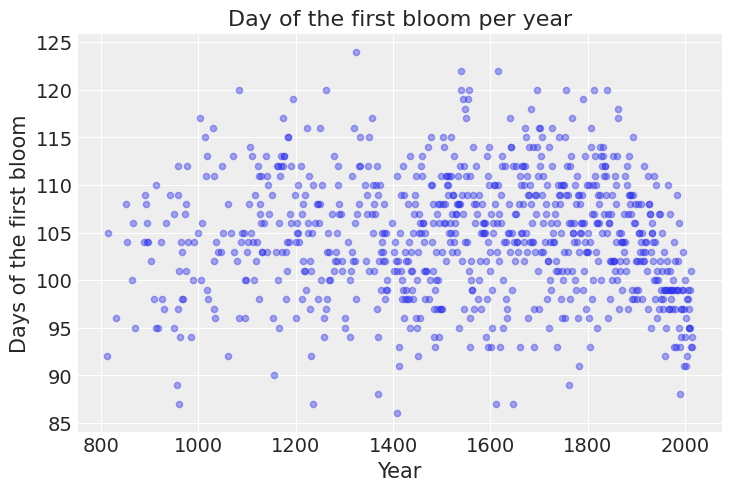

In [6]:
plot_scatter(data);

In [28]:
num_knots = 15
knots = np.quantile(data.year, np.linspace(0, 1, num_knots))
iknots = knots[1:-1]

In [29]:
def plot_knots(knots, ax):
    for knot in knots:
        ax.axvline(knot, color="0.1", alpha=0.4)
    return ax

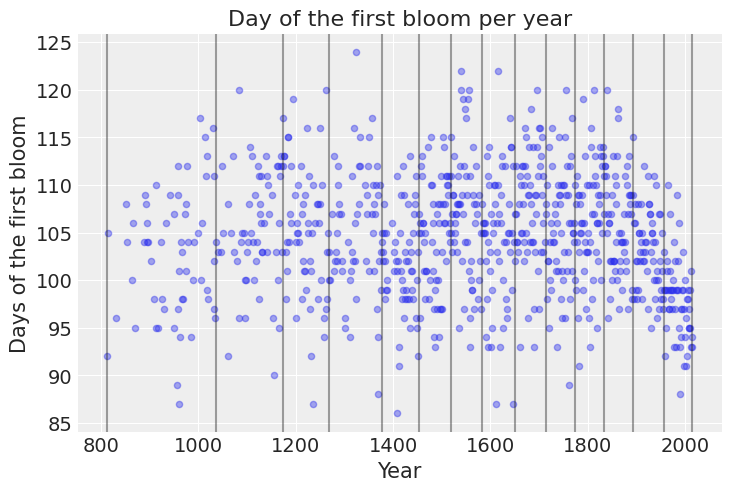

In [31]:
ax = plot_scatter(data)
plot_knots(knots, ax);

In [21]:
priors = {
    "common": bmb.Prior("Normal", mu=0, sigma=10), 
    "Intercept": bmb.Prior("Normal", mu=100, sigma=10)
}

model = bmb.Model("doy ~ bs(year, knots=iknots)", data, priors=priors)
model

Formula: doy ~ bs(year, knots=iknots)
Family name: Gaussian
Link: identity
Observations: 827
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 100, sigma: 10)
    bs(year, knots = iknots) ~ Normal(mu: 0, sigma: 10)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 6.4032)


In [22]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [doy_sigma, bs(year, knots = iknots), Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


In [23]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,102.302,2.080,98.556,106.209,0.091,0.064,526.0,664.0,1.0
"bs(year, knots = iknots)[0]",-0.764,3.967,-8.340,6.520,0.147,0.104,722.0,1100.0,1.0
"bs(year, knots = iknots)[1]",0.467,3.044,-4.916,6.428,0.083,0.064,1342.0,1356.0,1.0
"bs(year, knots = iknots)[2]",5.745,2.707,0.760,10.814,0.101,0.071,723.0,1036.0,1.0
"bs(year, knots = iknots)[3]",0.289,2.607,-4.554,5.218,0.095,0.067,758.0,967.0,1.0
"bs(year, knots = iknots)[4]",5.325,2.721,0.566,10.696,0.097,0.069,792.0,1035.0,1.0
"bs(year, knots = iknots)[5]",-4.246,2.568,-9.150,0.266,0.098,0.069,697.0,1079.0,1.0
"bs(year, knots = iknots)[6]",8.881,2.564,4.051,13.522,0.095,0.068,730.0,1005.0,1.0
"bs(year, knots = iknots)[7]",0.041,2.669,-4.958,4.983,0.093,0.065,834.0,1243.0,1.0
"bs(year, knots = iknots)[8]",4.049,2.677,-1.511,8.695,0.098,0.069,751.0,998.0,1.0


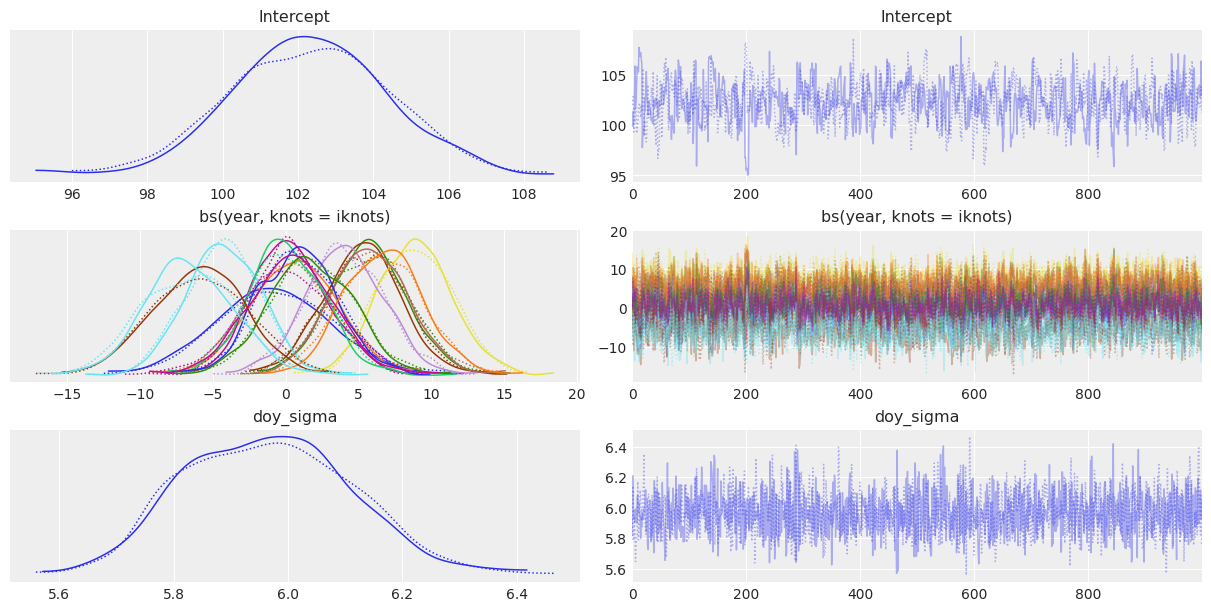

In [24]:
az.plot_trace(idata);

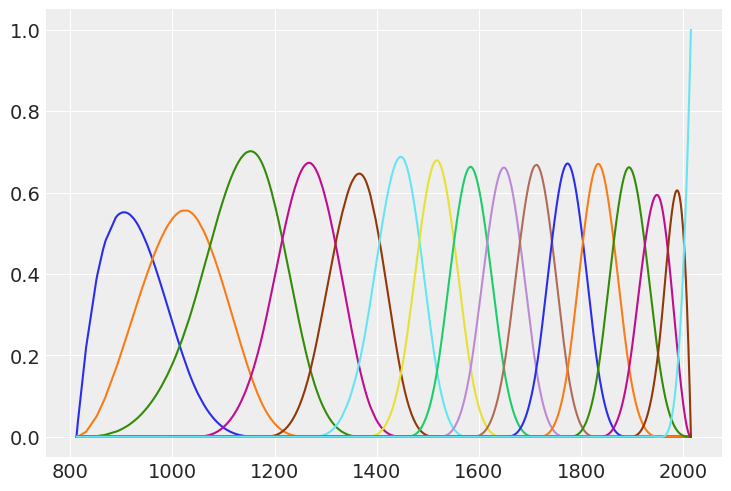

In [55]:
B = model._design.common["bs(year, knots = iknots)"]

spline_df = (
    pd.DataFrame(B)
    .assign(year=data.year.values)
    .melt("year", var_name="spline_i", value_name="value")
)

for i in spline_df.spline_i.unique():
    d = spline_df[spline_df.spline_i == i]
    plt.plot(d["year"], d["value"])

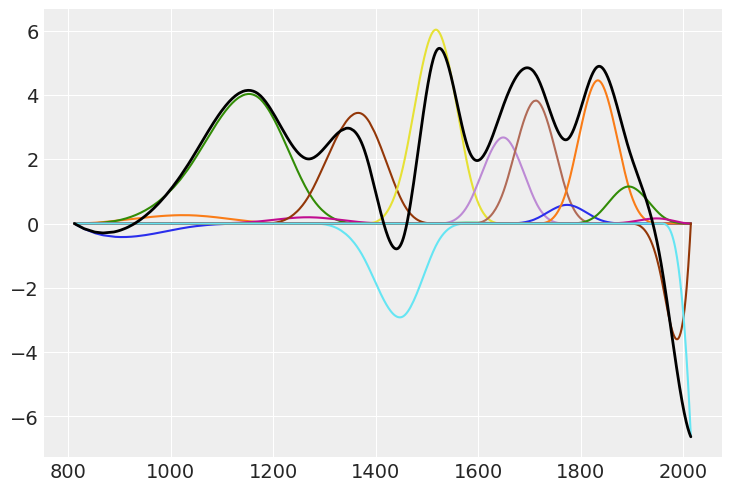

In [61]:
wp = idata.posterior["bs(year, knots = iknots)"].values.mean(axis=(0, 1))

spline_df = (
    pd.DataFrame(B * wp.T)
    .assign(year=data.year.values)
    .melt("year", var_name="spline_i", value_name="value")
)


for i in spline_df.spline_i.unique():
    d = spline_df[spline_df.spline_i == i]
    plt.plot(d["year"], d["value"])

plt.plot(data.year.values, np.dot(B, wp.T), color="black", lw=2)

In [59]:
spline_df

,year,spline_i,value
0,812,0,-0.000000
1,815,0,-0.030026
2,831,0,-0.168600
3,851,0,-0.294567
4,853,0,-0.304503
...,...,...,...
13227,2011,15,-5.375295
13228,2012,15,-5.673856
13229,2013,15,-5.983273
13230,2014,15,-6.303739


In [39]:
new_data = pd.DataFrame({"year": np.linspace(data.year.min(), data.year.max(), num=500)})
model.predict(idata, data=new_data)


y_hat = idata.posterior["doy_mean"].values
y_hat_mean = y_hat.mean((0, 1))
hdi_data = np.quantile(y_hat, [0.03, 0.94], axis=(0, 1))

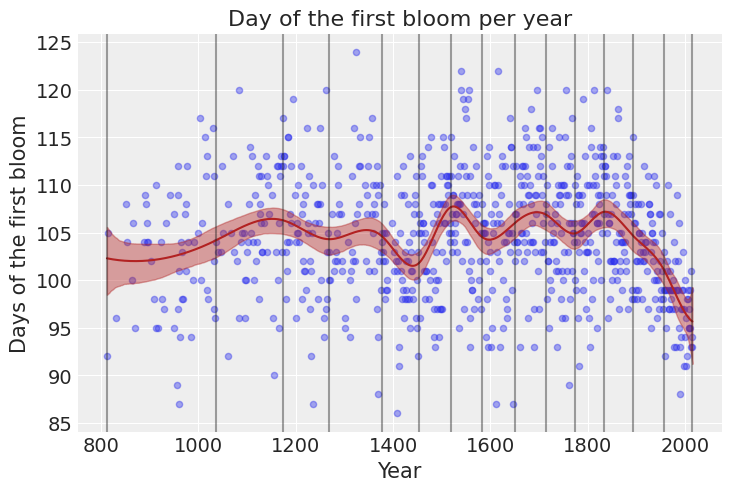

In [40]:
ax = plot_scatter(data)
ax.plot(new_data["year"], y_hat_mean, color="firebrick")
ax.fill_between(new_data["year"], hdi_data[0], hdi_data[1], alpha=0.4, color="firebrick")
plot_knots(knots, ax);

In [42]:
%load_ext watermark
%watermark -n -u -v -iv -w

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Thu Oct 14 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.18.1

arviz     : 0.11.2
sys       : 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
numpy     : 1.21.2
pandas    : 1.3.2
matplotlib: 3.4.3
bambi     : 0.6.3

Watermark: 2.1.0

